In [1]:
%run setup.py


In [2]:
mdates.set_epoch('2025-01-01')
from import_data import get_data


In [3]:
filenames = [
    'no-behav.sqlite',
    'every-x-timesteps.sqlite',
    'every-x-time-with-upstream-delay.sqlite',
    'failed_trade.sqlite',
    'item-packaging.sqlite',
    'partial-fail-pkg.sqlite',
    'normal_fill.sqlite',
    'uniform_fill.sqlite',
    'uniform-no-behav.sqlite',
    'first_with_random_demand.sqlite',
    'equal_with_random_demand.sqlite',
]

In [4]:
data = {}
for file in filenames:
    (name, file_data) = get_data(file)
    data[name] = file_data

In [5]:
data.keys()

dict_keys(['no-behav', 'every-x-timesteps', 'every-x-time-with-upstream-delay', 'failed_trade', 'item-packaging', 'partial-fail-pkg', 'normal_fill', 'uniform_fill', 'uniform-no-behav', 'first_with_random_demand', 'equal_with_random_demand'])

# Agents

In [6]:
# data['no-behav']['agents']

In [7]:
# data['every-x-timesteps']['agents']

In [8]:
# data['every-x-time-with-upstream-delay']['agents']

# Item packaging

# Every X day shipping

In [9]:
data['every-x-timesteps']['transactions'].head(2)

,SimId,ResourceId,ObjId,Type,TimeCreated,Quantity,Units,QualId,PackageName,Parent1,...,Commodity,Time,SenderSpec,SenderPrototype,ReceiverSpec,ReceiverPrototype,SenderProtAgentId,ReceiverProtAgentId,CumQuantityReceived,CumQuantitySent
0,ca9a7c70-f7a5-4af2-ae6f-8fa027d1e7bb,9,7,Material,0,1.0,kg,1,unpackaged,8,...,commod,0,:cycamore:Source,Source,:cycamore:Storage,Storage,Source18,Storage19,1.0,1.0
1,ca9a7c70-f7a5-4af2-ae6f-8fa027d1e7bb,9,7,Material,0,1.0,kg,1,unpackaged,8,...,commod1,1,:cycamore:Storage,Storage,:cycamore:Storage,StoragePackaging,Storage19,StoragePackaging20,1.0,1.0


In [10]:
data['every-x-timesteps']['transactions'].loc[data['every-x-timesteps']['transactions']['SenderId'] == 18].head(2)

,SimId,ResourceId,ObjId,Type,TimeCreated,Quantity,Units,QualId,PackageName,Parent1,...,Commodity,Time,SenderSpec,SenderPrototype,ReceiverSpec,ReceiverPrototype,SenderProtAgentId,ReceiverProtAgentId,CumQuantityReceived,CumQuantitySent
0,ca9a7c70-f7a5-4af2-ae6f-8fa027d1e7bb,9,7,Material,0,1.0,kg,1,unpackaged,8,...,commod,0,:cycamore:Source,Source,:cycamore:Storage,Storage,Source18,Storage19,1.0,1.0
2,ca9a7c70-f7a5-4af2-ae6f-8fa027d1e7bb,18,14,Material,1,1.0,kg,1,unpackaged,17,...,commod,1,:cycamore:Source,Source,:cycamore:Storage,Storage,Source18,Storage19,2.0,2.0


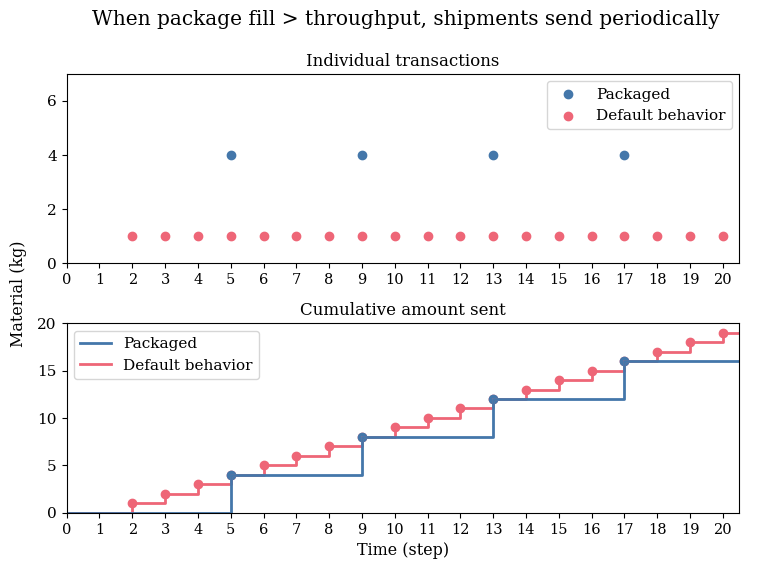

In [11]:
fig = plt.figure(figsize = (8, 6))

ax = fig.add_subplot(111)
ax.set_xlabel('Time (step)')
ax.set_ylabel('Material (kg)')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top= False, bottom= False, left= False, right= False)

ax0 = fig.add_subplot(211)
# ax.set_xlabel('Time')
# ax.set_ylabel('Quantity Received')
plt.xlim(-0,20.5)
plt.ylim(0,7)
ax0.set_xticks(np.arange(0, 21, 1))
# ax0.set_yticks(np.arange(0, 10, 2.5))

ax0.scatter(data['every-x-timesteps']['transactions'].loc[data['every-x-timesteps']['transactions']['SenderId'] == 20]['Time'],
            data['every-x-timesteps']['transactions'].loc[data['every-x-timesteps']['transactions']['SenderId'] == 20]['Quantity'],
            color= palette[0],
            label='Packaged')

ax0.scatter(data['no-behav']['transactions'].loc[data['no-behav']['transactions']['SenderId'] == 20]['Time'],
            data['no-behav']['transactions'].loc[data['no-behav']['transactions']['SenderId'] == 20]['Quantity'],
            color= palette[1],
            label='Default behavior')


ax0.set_title('Individual transactions')
ax0.legend()

#
#####
#

ax1 = fig.add_subplot(212, sharex=ax0)

ax1.step(data['no-behav']['transactions'].loc[data['no-behav']['transactions']['SenderId'] == 20]['Time'],
            data['no-behav']['transactions'].loc[data['no-behav']['transactions']['SenderId'] == 20]['Quantity'].cumsum(),
            color= palette[1],
            where='post',
            label='Default behavior')
ax1.scatter(data['no-behav']['transactions'].loc[data['no-behav']['transactions']['SenderId'] == 20]['Time'],
            data['no-behav']['transactions'].loc[data['no-behav']['transactions']['SenderId'] == 20]['Quantity'].cumsum(),
            color= palette[1])
ax1.hlines(y=0, xmin=0, xmax=2, colors=palette[1])
ax1.vlines(x=2, ymin=0, ymax=1, colors=palette[1])

ax1.step(data['every-x-timesteps']['transactions'].loc[data['every-x-timesteps']['transactions']['SenderId'] == 20]['Time'],
            data['every-x-timesteps']['transactions'].loc[data['every-x-timesteps']['transactions']['SenderId'] == 20]['Quantity'].cumsum(),
            color= palette[0],
            where='post',
            label='Packaged')
ax1.scatter(data['every-x-timesteps']['transactions'].loc[data['every-x-timesteps']['transactions']['SenderId'] == 20]['Time'],
            data['every-x-timesteps']['transactions'].loc[data['every-x-timesteps']['transactions']['SenderId'] == 20]['Quantity'].cumsum(),
            color= palette[0])
ax1.hlines(y=0, xmin=0, xmax=5, colors=palette[0])
ax1.vlines(x=5, ymin=0, ymax=4, colors=palette[0])

ax1.set_title('Cumulative amount sent')

ax1.set_ylim(0,20)
ax1.set_yticks(np.arange(0, 22, 5))

handles, labels = ax1.get_legend_handles_labels()
order=[1,0]
ax1.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

fig.suptitle('When package fill > throughput, shipments send periodically', x=0.55)
fig.tight_layout()

plt.savefig('plots/every-x-timesteps', transparent=True)

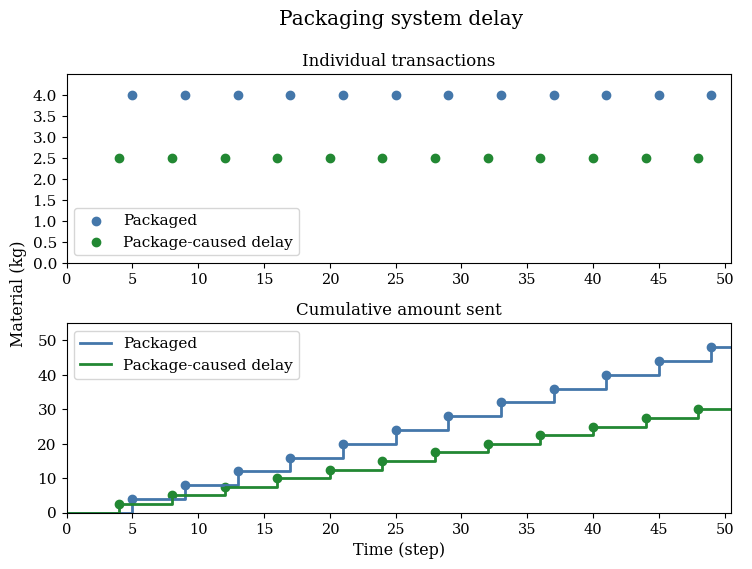

In [12]:
fig = plt.figure(figsize = (8, 6))

ax = fig.add_subplot(111)
ax.set_xlabel('Time (step)')
ax.set_ylabel('Material (kg)')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top= False, bottom= False, left= False, right= False)

ax0 = fig.add_subplot(211)
# ax.set_xlabel('Time')
# ax.set_ylabel('Quantity Received')
ax0.set_xticks(np.arange(0, 55, 5))
ax0.set_xlim(-0,50.5)
ax0.set_ylim(0,4.51)

# ax0.set_yticks(np.arange(0, 10, 2.5))

ax0.scatter(data['every-x-timesteps']['transactions'].loc[data['every-x-timesteps']['transactions']['SenderId'] == 20]['Time'],
            data['every-x-timesteps']['transactions'].loc[data['every-x-timesteps']['transactions']['SenderId'] == 20]['Quantity'],
            color= palette[0],
            label='Packaged')

ax0.scatter(data['every-x-time-with-upstream-delay']['transactions'].loc[data['every-x-time-with-upstream-delay']['transactions']['SenderId'] == 20]['Time'],
            data['every-x-time-with-upstream-delay']['transactions'].loc[data['every-x-time-with-upstream-delay']['transactions']['SenderId'] == 20]['Quantity'],
            color= palette[2],
            label='Package-caused delay')


ax0.set_title('Individual transactions')
ax0.legend()
ax0.set_yticks(np.arange(0, 4.5, 0.5))

#
#####
#

ax1 = fig.add_subplot(212, sharex=ax0)

ax1.step(data['every-x-timesteps']['transactions'].loc[data['every-x-timesteps']['transactions']['SenderId'] == 20]['Time'],
            data['every-x-timesteps']['transactions'].loc[data['every-x-timesteps']['transactions']['SenderId'] == 20]['Quantity'].cumsum(),
            color= palette[0],
            where='post',
            label='Packaged')
ax1.scatter(data['every-x-timesteps']['transactions'].loc[data['every-x-timesteps']['transactions']['SenderId'] == 20]['Time'],
            data['every-x-timesteps']['transactions'].loc[data['every-x-timesteps']['transactions']['SenderId'] == 20]['Quantity'].cumsum(),
            color= palette[0])
ax1.hlines(y=0, xmin=0, xmax=5, colors=palette[0])
ax1.vlines(x=5, ymin=0, ymax=4, colors=palette[0])

ax1.step(data['every-x-time-with-upstream-delay']['transactions'].loc[data['every-x-time-with-upstream-delay']['transactions']['SenderId'] == 20]['Time'],
            data['every-x-time-with-upstream-delay']['transactions'].loc[data['every-x-time-with-upstream-delay']['transactions']['SenderId'] == 20]['Quantity'].cumsum(),
            color= palette[2],
            where='post',
            label='Package-caused delay')
ax1.scatter(data['every-x-time-with-upstream-delay']['transactions'].loc[data['every-x-time-with-upstream-delay']['transactions']['SenderId'] == 20]['Time'],
            data['every-x-time-with-upstream-delay']['transactions'].loc[data['every-x-time-with-upstream-delay']['transactions']['SenderId'] == 20]['Quantity'].cumsum(),
            color= palette[2])
ax1.hlines(y=0, xmin=0, xmax=4, colors=palette[2])
ax1.vlines(x=4, ymin=0, ymax=2.5, colors=palette[2])

ax1.set_ylim(0,55)

ax1.set_title('Cumulative amount sent')

ax1.legend()

fig.suptitle('Packaging system delay', x=0.55)
fig.tight_layout()

plt.savefig('plots/every-x-delay', transparent=True)

In [13]:
data['item-packaging']['resources']

,SimId,ResourceId,ObjId,Type,TimeCreated,Quantity,Units,QualId,PackageName,Parent1,Parent2
0,5c8f2332-34e9-4bfc-9045-38338c728dcd,1,1,Material,0,10.0,kg,1,unpackaged,0,0
1,5c8f2332-34e9-4bfc-9045-38338c728dcd,6,5,Material,0,4.0,kg,1,unpackaged,1,0
2,5c8f2332-34e9-4bfc-9045-38338c728dcd,7,1,Material,0,6.0,kg,1,unpackaged,1,0
3,5c8f2332-34e9-4bfc-9045-38338c728dcd,8,6,Material,0,4.0,kg,1,pkg,6,0
4,5c8f2332-34e9-4bfc-9045-38338c728dcd,10,7,Material,0,4.0,kg,1,unpackaged,7,0
5,5c8f2332-34e9-4bfc-9045-38338c728dcd,11,1,Material,0,2.0,kg,1,unpackaged,7,0
6,5c8f2332-34e9-4bfc-9045-38338c728dcd,12,8,Material,0,4.0,kg,1,pkg,10,0


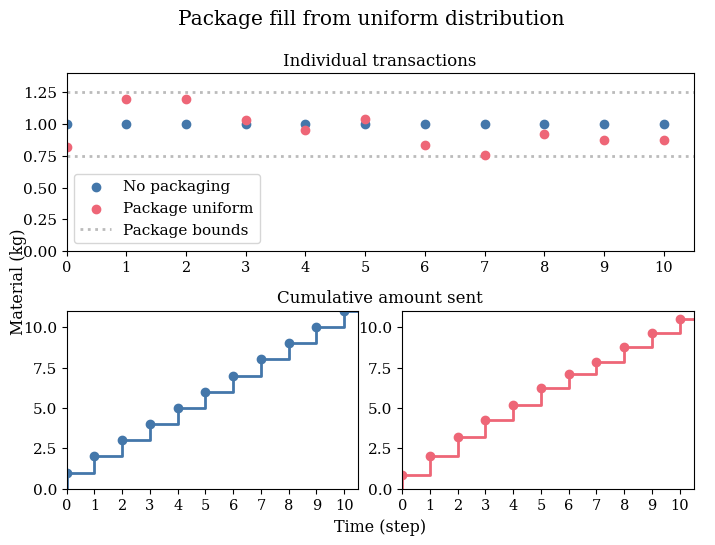

In [14]:
tr0=data['uniform-no-behav']['transactions'].loc[data['uniform-no-behav']['transactions']['SenderSpec'] == ':cycamore:Source']
tr1=data['uniform_fill']['transactions'].loc[data['uniform_fill']['transactions']['SenderSpec'] == ':cycamore:Source']

fig = plt.figure(figsize = (8, 6))

ax = fig.add_subplot(111)
ax.set_xlabel('Time (step)')
ax.set_ylabel('Material (kg)')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top= False, bottom= False, left= False, right= False)

ax_bottom = fig.add_subplot(212)
ax_bottom.set_title('Cumulative amount sent')
ax_bottom.spines['top'].set_color('none')
ax_bottom.spines['bottom'].set_color('none')
ax_bottom.spines['left'].set_color('none')
ax_bottom.spines['right'].set_color('none')
ax_bottom.tick_params(labelcolor='w', top= False, bottom= False, left= False, right= False)

ax0 = fig.add_subplot(211)
# ax.set_xlabel('Time')
# ax.set_ylabel('Quantity Received')
ax0.set_xticks(np.arange(0, 11, 1))
ax0.set_xlim(-0,10.5,1)
ax0.set_ylim(0,1.4)# ax0.set_yticks(np.arange(0, 10, 2.5))

ax0.scatter(tr0['Time'],
            tr0['Quantity'],
            color= palette[0],
            label='No packaging')

ax0.scatter(tr1['Time'],
            tr1['Quantity'],
            color= palette[1],
            label='Package uniform')

ax0.hlines(y=0.75, xmin=0, xmax=21, colors=palette[-2], linestyles='dotted', label='Package bounds', zorder=0)
ax0.hlines(y=1.25, xmin=0, xmax=21, colors=palette[-2], linestyles='dotted', zorder=0)

ax0.set_title('Individual transactions')
ax0.legend()
ax0.set_yticks(np.arange(0, 1.4, 0.25))

#
#####
#

ax1 = fig.add_subplot(223, sharex=ax0)

ax1.step(tr0['Time'],
         tr0['Quantity'].cumsum(),
            color= palette[0],
            where='post',
            label='No behavior')
ax1.scatter(tr0['Time'],
            tr0['Quantity'].cumsum(),
            color= palette[0])
ax1.vlines(x=0, ymin=0, ymax=1, colors=palette[0])

ax2 = fig.add_subplot(224, sharex=ax0, sharey=ax1)

ax2.step(tr1['Time'],
            tr1['Quantity'].cumsum(),
            color= palette[1],
            where='post',
            label='Package uniform')
ax2.scatter(tr1['Time'],
            tr1['Quantity'].cumsum(),
            color= palette[1])
ax2.vlines(x=0, ymin=0, ymax=tr1['Quantity'][0], colors=palette[1])

ax1.set_ylim(0,11)

# ax1.legend()

fig.suptitle('Package fill from uniform distribution', x=0.55)
fig.tight_layout()

plt.savefig('plots/every-x-cumulative', transparent=True)

/tmp/ipykernel_7967/2393495361.py:57: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.histplot(data=tr1, y='Quantity',
/tmp/ipykernel_7967/2393495361.py:72: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.histplot(data=tr2, y='Quantity',


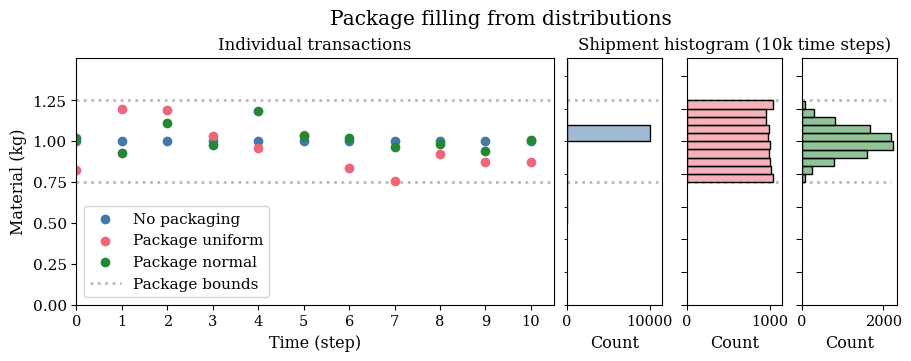

In [15]:
tr0=data['uniform-no-behav']['transactions'].loc[data['uniform-no-behav']['transactions']['SenderSpec'] == ':cycamore:Source']
tr1=data['uniform_fill']['transactions'].loc[data['uniform_fill']['transactions']['SenderSpec'] == ':cycamore:Source']
tr2=data['normal_fill']['transactions'].loc[data['normal_fill']['transactions']['SenderSpec'] == ':cycamore:Source']


fig, (ax0, ax1, ax2, ax3) = plt.subplots(1, 4, gridspec_kw={'width_ratios': [5, 1, 1, 1]}, constrained_layout=True)
fig.set_size_inches(9,3.5)

# ax.set_xlabel('Time')
# ax.set_ylabel('Quantity Received')
ax0.set_xticks(np.arange(0, 11, 1))
ax0.set_xlim(-0,10.5,1)
ax0.set_ylim(0,1.51)# ax0.set_yticks(np.arange(0, 10, 2.5))

ax0.scatter(tr0['Time'],
            tr0['Quantity'],
            color= palette[0],
            label='No packaging')

ax0.scatter(tr1['Time'],
            tr1['Quantity'],
            color= palette[1],
            label='Package uniform')

ax0.scatter(tr2['Time'],
            tr2['Quantity'],
            color= palette[2],
            label='Package normal')


ax0.hlines(y=0.75, xmin=0, xmax=21, colors=palette[-2], linestyles='dotted', label='Package bounds', zorder=0)
ax0.hlines(y=1.25, xmin=0, xmax=21, colors=palette[-2], linestyles='dotted', zorder=0)

ax0.set_title('Individual transactions')
ax0.legend()
ax0.set_yticks(np.arange(0, 1.4, 0.25))
ax0.set_xlabel('Time (step)')
ax0.set_ylabel('Material (kg)')

#
#####
#

sns.histplot(data=tr0, y='Quantity', 
             bins=10,
             hue='SenderId',palette=sns.color_palette([palette[0]],1),
                 ax=ax1)
ax1.set_ylim(0,1.51)
ax1.get_legend().remove()
ax2.set_xlim(0,11000)
ax1.set_ylabel('')
ax1.set_yticks([])
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(0.2))
ax1.hlines(y=0.75, xmin=0, xmax=11000, colors=palette[-2], linestyles='dotted', label='Package bounds', zorder=0)
ax1.hlines(y=1.25, xmin=0, xmax=11000, colors=palette[-2], linestyles='dotted', zorder=0)

sns.histplot(data=tr1, y='Quantity', 
             bins=10,
             hue='SenderId',palette=sns.color_palette(palette[1:2],2),
                 ax=ax2)
ax2.set_ylim(0,1.51)
ax2.get_legend().remove()
ax2.set_title('Shipment histogram (10k time steps)')
ax2.set_xlim(0,1150)
ax2.set_ylabel('')
ax2.set_yticks([])
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(0.2))
ax2.tick_params(axis='both', which='minor', length=4, width=0.75) 
ax2.hlines(y=0.75, xmin=0, xmax=1150, colors=palette[-2], linestyles='dotted', label='Package bounds', zorder=0)
ax2.hlines(y=1.25, xmin=0, xmax=1150, colors=palette[-2], linestyles='dotted', zorder=0)

sns.histplot(data=tr2, y='Quantity', 
             bins=10,
             hue='SenderId',palette=sns.color_palette(palette[2:3],2),
                 ax=ax3)
ax3.set_ylim(0,1.51)
ax3.get_legend().remove()
ax3.set_xlim(0,2350)
ax3.set_ylabel('')
ax3.set_yticks([])
ax3.yaxis.set_minor_locator(ticker.MultipleLocator(0.2))
ax3.tick_params(axis='both', which='minor', length=4, width=0.75) 
ax3.hlines(y=0.75, xmin=0, xmax=2200, colors=palette[-2], linestyles='dotted', label='Package bounds', zorder=0)
ax3.hlines(y=1.25, xmin=0, xmax=2200, colors=palette[-2], linestyles='dotted', zorder=0)

fig.suptitle('Package filling from distributions', x=0.55)
# fig.tight_layout()

plt.savefig('plots/pkg_distributions_normal_uniform', transparent=True)

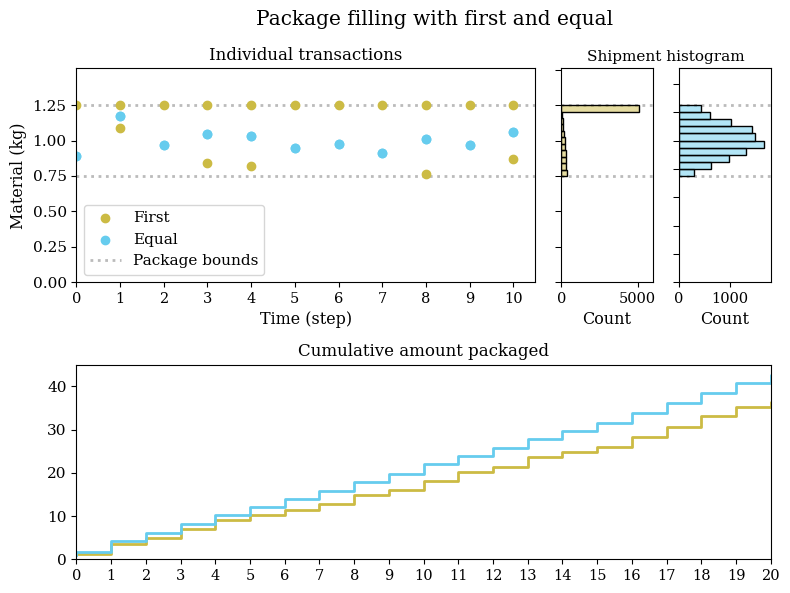

In [16]:
tr0=data['first_with_random_demand']['transactions'].loc[data['first_with_random_demand']['transactions']['SenderSpec'] == ':cycamore:Source']
tr1=data['equal_with_random_demand']['transactions'].loc[data['equal_with_random_demand']['transactions']['SenderSpec'] == ':cycamore:Source']


fig, ax = plt.subplots(2, 3, gridspec_kw={'width_ratios': [5, 1, 1], 'height_ratios': [1.1, 1]})#, constrained_layout=True)

gs = ax[1, 2].get_gridspec()
ax[1,0].remove()
ax[1,1].remove()
ax[1,2].remove()
ax[1,0] = fig.add_subplot(gs[1,:])

# # remove the underlying axes
# for ax in f7_axs[1:, -1]:
#     ax.remove()
# axbig = fig7.add_subplot(gs[1:, -1])


fig.set_size_inches(8,6)

# ax.set_xlabel('Time')
# ax.set_ylabel('Quantity Received')
ax[0,0].set_xticks(np.arange(0, 11, 1))
ax[0,0].set_xlim(-0,10.5,1)
ax[0,0].set_ylim(0,1.51)

ax[0,0].scatter(tr0['Time'],
            tr0['Quantity'],
            color= palette[3],
            label='First')

ax[0,0].scatter(tr1['Time'],
            tr1['Quantity'],
            color= palette[4],
            label='Equal')

ax[0,0].hlines(y=0.75, xmin=0, xmax=21, colors=palette[-2], linestyles='dotted', label='Package bounds', zorder=0)
ax[0,0].hlines(y=1.25, xmin=0, xmax=21, colors=palette[-2], linestyles='dotted', zorder=0)

ax[0,0].set_title('Individual transactions')
ax[0,0].legend()
ax[0,0].set_yticks(np.arange(0, 1.4, 0.25))
ax[0,0].set_xlabel('Time (step)')
ax[0,0].set_ylabel('Material (kg)')

#
#####
#

sns.histplot(data=tr0, y='Quantity', 
             bins=11,
             hue='SenderId',palette=sns.color_palette([palette[3]],1),
                 ax=ax[0,1])
ax[0,1].set_ylim(0,1.51)
ax[0,1].get_legend().remove()
ax[0,1].set_xlim(0,6000)
ax[0,1].set_ylabel('')
ax[0,1].set_yticks([])
ax[0,1].yaxis.set_minor_locator(ticker.MultipleLocator(0.25))
ax[0,1].tick_params(axis='both', which='minor', length=4, width=0.75) 
ax[0,1].hlines(y=0.75, xmin=0, xmax=6000, colors=palette[-2], linestyles='dotted', label='Package bounds', zorder=0)
ax[0,1].hlines(y=1.25, xmin=0, xmax=6000, colors=palette[-2], linestyles='dotted', zorder=0)

sns.histplot(data=tr1, y='Quantity', 
             bins=10,
             hue='SenderId',palette=sns.color_palette([palette[4]],1),
                 ax=ax[0,2])
ax[0,2].set_ylim(0,1.51)
ax[0,2].get_legend().remove()
ax[0,2].set_xlim(0,1800)
ax[0,2].set_ylabel('')
ax[0,2].set_yticks([])
ax[0,2].yaxis.set_minor_locator(ticker.MultipleLocator(0.2))
ax[0,2].tick_params(axis='both', which='minor', length=4, width=0.75) 
ax[0,2].hlines(y=0.75, xmin=0, xmax=1800, colors=palette[-2], linestyles='dotted', label='Package bounds', zorder=0)
ax[0,2].hlines(y=1.25, xmin=0, xmax=1800, colors=palette[-2], linestyles='dotted', zorder=0)

ax[1,0].step(tr0['Time'],
            tr0['Quantity'].cumsum(),
             where='post',
            color= palette[3],
            label='First')

ax[1,0].step(tr1['Time'],
            tr1['Quantity'].cumsum(),
             where='post',
            color= palette[4],
            label='Equal')
ax[1,0].set_title('Cumulative amount packaged')
ax[1,0].set_xlim(0,20)
ax[1,0].set_ylim(0,45)
ax[1,0].set_xticks(np.arange(0, 21, 1))

fig.text(0.74,0.895,'Shipment histogram', fontsize=11)

fig.suptitle('Package filling with first and equal', x=0.55)
fig.tight_layout()

plt.savefig('plots/pkg_distributions_first_equal', transparent=True)